# Лабораторная работа №2
## Выполнил студент группы ББМО-01-23 Егоров Ю.А.

In [2]:
import kagglehub

path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print(path)

100%|██████████| 612M/612M [01:08<00:00, 9.37MB/s] 

Extracting files...


/Users/egorov_y/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


In [3]:
!mv /Users/egorov_y/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1 /Users/egorov_y/AZSII/lab_2

In [4]:
import torch
device = torch.device("cuda")

In [12]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Загрузка и подготовка набора данных
def load_gtsrb_data(data_dir):
    images = []
    labels = []
    for label in range(43):
        class_dir = os.path.join(data_dir, str(label))
        if not os.path.exists(class_dir):
            print(f"Папка {class_dir} не найдена. Пропускаем...")
            continue
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

data_dir = "/Users/egorov_y/AZSII/lab_2/1/Train"

# Загрузка данных
images, labels = load_gtsrb_data(data_dir)

# Разделение на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encoding меток классов
y_train = to_categorical(y_train, num_classes=43)
y_val = to_categorical(y_val, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

print(f"Размеры: X_train={X_train.shape}, X_val={X_val.shape}, X_test={X_test.shape}")

Размеры: X_train=(27446, 32, 32, 3), X_val=(5881, 32, 32, 3), X_test=(5882, 32, 32, 3)


In [13]:
# Для уменьшения времени работы проведем обучение лишь на ограниченной выборке из 5000 штук
small_X_train = X_train[:5000]
small_y_train = y_train[:5000]

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model, layers, optimizers

# Загрузка VGG16 с предобученными весами
base_model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
x = layers.Flatten()(base_model_vgg.output)
x = layers.Dense(128, activation="relu")(x)
output = layers.Dense(43, activation="softmax")(x)

model_vgg = Model(inputs=base_model_vgg.input, outputs=output)

# Компиляция модели
model_vgg.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Обучение
history_vgg = model_vgg.fit(
    small_X_train, small_y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=32
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 151s 951ms/step - accuracy: 0.0481 - loss: 3.6442 - val_accuracy: 0.0590 - val_loss: 3.5038
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 152s 966ms/step - accuracy: 0.0596 - loss: 3.5065 - val_accuracy: 0.0825 - val_loss: 3.4407
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 874ms/step - accuracy: 0.0880 - loss: 3.4445 - val_accuracy: 0.0893 - val_loss: 3.3353
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 141s 899ms/step - accuracy: 0.0936 - loss: 3.3374 - val_accuracy: 0.0974 - val_loss: 3.2409
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.1610 - loss: 2.8692 - val_accuracy: 0.2938 - val_loss: 2.2865


In [15]:
from tensorflow.keras.applications import ResNet50

# Загрузка ResNet50 с предобученными весами
base_model_resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
x = layers.Flatten()(base_model_resnet.output)
x = layers.Dense(128, activation="relu")(x)
output = layers.Dense(43, activation="softmax")(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

# Компиляция модели
model_resnet.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Обучение
history_resnet = model_resnet.fit(
    small_X_train, small_y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=32
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 158s 854ms/step - accuracy: 0.2816 - loss: 3.0243 - val_accuracy: 0.0733 - val_loss: 4.8935
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 107s 683ms/step - accuracy: 0.5208 - loss: 1.6035 - val_accuracy: 0.0403 - val_loss: 8.7388
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 107s 685ms/step - accuracy: 0.7155 - loss: 0.9958 - val_accuracy: 0.1660 - val_loss: 3.9152
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 118s 753ms/step - accuracy: 0.7422 - loss: 0.8565 - val_accuracy: 0.2967 - val_loss: 2.6792
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 676ms/step - accuracy: 0.7653 - loss: 0.7859 - val_accuracy: 0.6550 - val_loss: 3.1809


VGG16 - Тестовая точность: 0.29, Тестовая потеря: 2.28
ResNet50 - Тестовая точность: 0.66, Тестовая потеря: 3.18


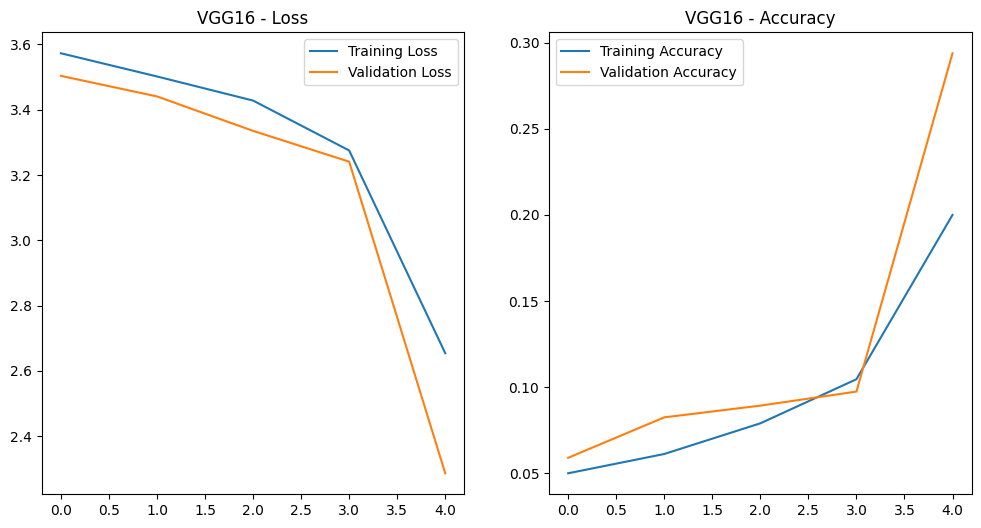

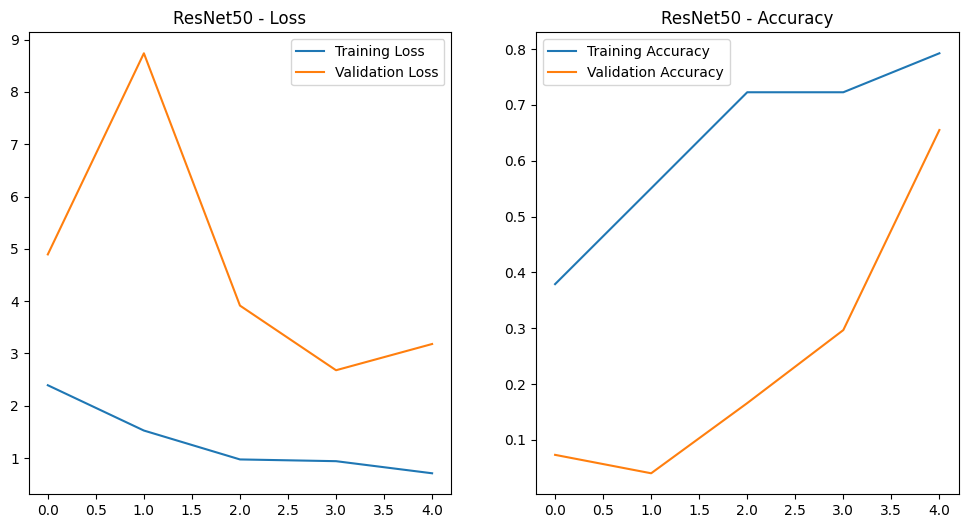

In [16]:
# Оценка моделей
vgg_eval = model_vgg.evaluate(X_test, y_test, verbose=0)
resnet_eval = model_resnet.evaluate(X_test, y_test, verbose=0)

print(f"VGG16 - Тестовая точность: {vgg_eval[1]:.2f}, Тестовая потеря: {vgg_eval[0]:.2f}")
print(f"ResNet50 - Тестовая точность: {resnet_eval[1]:.2f}, Тестовая потеря: {resnet_eval[0]:.2f}")

# Построение графиков функции потерь и точности
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{title} - Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.legend()
    plt.show()

plot_history(history_vgg, "VGG16")
plot_history(history_resnet, "ResNet50")

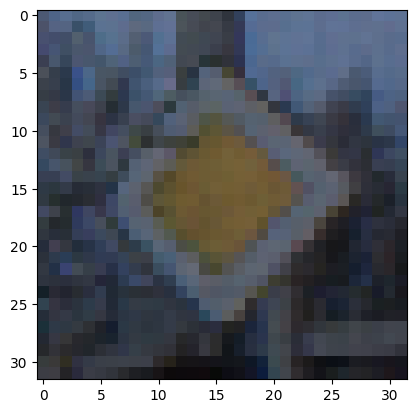

In [17]:
def fgsm_attack(model, image, label, epsilon=0.01):
    image = tf.convert_to_tensor([image], dtype=tf.float32)
    label = tf.convert_to_tensor([label], dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)

    gradient = tape.gradient(loss, image)
    perturbation = epsilon * tf.sign(gradient)
    adversarial_image = tf.clip_by_value(image + perturbation, 0, 1)
    return adversarial_image[0]

# Пример атаки на одно изображение
adv_image = fgsm_attack(model_vgg, X_test[0], y_test[0])
plt.imshow(adv_image.numpy())

In [18]:
# Проверка эффективности FGSM-атак на ResNet50
for i in range(10):  # Пример из 10 изображений
    adv_image = fgsm_attack(model_vgg, X_test[i], y_test[i])
    pred_resnet = np.argmax(model_resnet.predict(tf.convert_to_tensor([adv_image])))
    true_label = np.argmax(y_test[i])
    print(f"Истинный класс: {true_label}, Предсказание ResNet50: {pred_resnet}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Истинный класс: 12, Предсказание ResNet50: 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Истинный класс: 10, Предсказание ResNet50: 38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Истинный класс: 10, Предсказание ResNet50: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Истинный класс: 25, Предсказание ResNet50: 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Истинный класс: 3, Предсказание ResNet50: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Истинный класс: 28, Предсказание ResNet50: 24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Истинный класс: 33, Предсказание ResNet50: 33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Истинный класс: 1, Предсказание ResNet50: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Истинный класс: 30, Предсказание ResNet50: 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Истинный класс: 11, Предсказание ResNet50: 11
